# **_Basic Neural Network Model_**

<br>

### __*Import Libraries*__

In [1]:
import nn
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

<br>

### __*Neural Network*__

In [2]:
class NeuralNetwork:
    def __init__(self, layers, activation='sigmoid'):
        self.layers = layers
        self.activation = activation
        self.weights = []
        self.biases = []

        # Initialize weights and biases for layers
        for i in range(1, len(layers)):
            self.weights.append(np.random.randn(layers[i-1], layers[i]))
            self.biases.append(np.zeros((1, layers[i])))

    def forward(self, X):
        """Perform forward pass through the network"""
        activations = [X]
        for i in range(len(self.weights)):
            net_inputs = np.dot(activations[-1], self.weights[i]) + self.biases[i]
            if self.activation == 'sigmoid':
                activations.append(nn.sigmoid(net_inputs))
            elif self.activation == 'relu':
                activations.append(nn.relu(net_inputs))
        return activations[-1]

    def train(self, X, y, learning_rate=0.1, epochs=1000):
        error_history = []
        for i in range(epochs):
            activations = [X]
            net_inputs = []
            # Perform forward pass through the network
            for j in range(len(self.weights)):
                net_inputs.append(np.dot(activations[-1], self.weights[j]) + self.biases[j])
                if self.activation == 'sigmoid':
                    activations.append(nn.sigmoid(net_inputs[-1]))
                elif self.activation == 'relu':
                    activations.append(nn.relu(net_inputs[-1]))

            # Calculate error of the output layer
            error = y - activations[-1]

            # Calculate the mean squared error
            error_history.append(np.mean(np.square(error)))

            # Back-propagate the error
            if self.activation == 'sigmoid':
                deltas = [error * nn.sigmoid_derivative(activations[-1])]
                for j in range(len(self.weights)-1, 0, -1):
                    deltas.append(np.dot(deltas[-1], self.weights[j].T) * nn.sigmoid_derivative(activations[j]))
                deltas.reverse()
            elif self.activation == 'relu':
                deltas = [error * nn.relu_derivative(activations[-1])]
                for j in range(len(self.weights)-1, 0, -1):
                    deltas.append(np.dot(deltas[-1], self.weights[j].T) * nn.relu_derivative(activations[j]))
                deltas.reverse()
            else:
                raise ReferenceError("Unknown activation function", self.activation)

            # Update weights and biases using calculated deltas
            for j in range(len(self.weights)):
                self.weights[j] += learning_rate * np.dot(activations[j].T, deltas[j])
                self.biases[j] += learning_rate * np.sum(deltas[j], axis=0, keepdims=True)
        return error_history

    def precision(self, X, y):
        predictions = self.forward(X)
        total_len = len(predictions)
        correct = 0
        for idx in range(total_len):
            switch = True
            for j in range(len(predictions[idx])):
                if round(predictions[idx][j]) != y[idx][j]:
                    switch = False
                    break
            if switch:
                correct += 1
        return correct / total_len

<br>

### __*Dataset*__

In [3]:
# Prepare the dataset
dataset = nn.load_dataset('data/heart.csv')
train_data, test_data = nn.heart_split_dataset(dataset, shuffle=True)
X_train, y_train = nn.xy_split_dataset(train_data)
X_test, y_test = nn.xy_split_dataset(test_data)

# Show structure of dataset
heart = pd.read_csv('data/heart.csv')
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<br>

### __*Model Training Phase*__

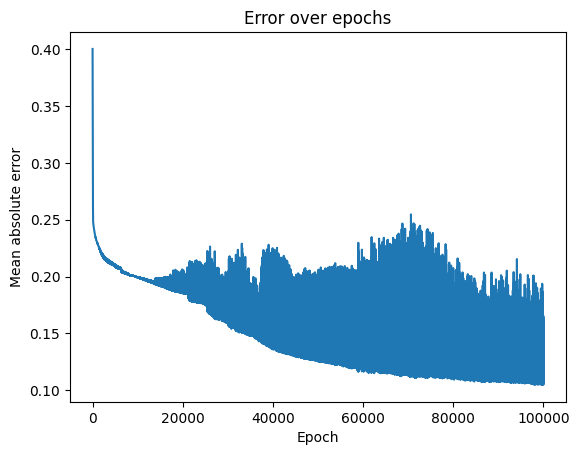

In [4]:
# Initialize neural network model
input_len = len(X_train[0])
output_len = len(y_train[0])
structure = [input_len, 30, 30, output_len]
activ = 'sigmoid'
model = NeuralNetwork(structure, activ)

# Train the network for 10000 epochs
lr = 0.0001
iters = 100_000
error_lst = model.train(X_train, y_train, lr, iters)

# # Print the final predictions and errors
# predictions = model.forward(X_train)
# print("Predictions:")
# print(predictions)
# print()
#
# print("Errors:")
# for error in error_history:
#     print(error)
# print()

# Plot the error over epochs
plt.plot(range(iters), error_lst)
plt.title("Error over epochs")
plt.xlabel("Epoch")
plt.ylabel("Mean absolute error")
plt.show()

<br>

### __*Model Testing Phase*__

In [5]:
print(f'Precision: {model.precision(X_test, y_test)*100}%')

Precision: 77.04918032786885%
